# Session 01: Model and Cost Function I
## Linear Regression 


In [1]:
import scipy as sp

data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


### Preprocessing and cleaning the data

In [2]:
x = data[:, 0]
y = data[:, 1]

In [3]:
print("Number of invalid entries:", sp.sum(sp.isnan(y)))
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
print len(y)

('Number of invalid entries:', 8)
735


In [4]:
import matplotlib.pyplot as plt #Allows to create charts
%matplotlib inline 

def plot_data(x, y, s):
    plt.scatter(x, y, s=s)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
    plt.autoscale(tight=True)
    plt.grid()
    plt.show()
    
def plot_model(f, linestyle, linewidth, color):
    fx = sp.linspace(0, x[-1], 1000)
    plt.plot(fx, f(fx), linestyle=linestyle, linewidth=linewidth, c=color)
    plt.legend(["model d=%i" % f.order], loc="upper left")

### Choosing the right model and learning algorithm

How long will our server handle the incomming web traffic?
- Find the real model behind the noisy data points.
- Use the model to extrapolate into the future to find the point in time where out infraestructure has to be extended.

In [5]:
def error(f, x, y):
    return  sp.sum((f(x) - y) ** 2)

In [6]:
# create and plot models: Polynomial of degree = 1
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)

f1 = sp.poly1d(fp1)
print ("h(x): %s" % f1)

Model parameters of fp1: [   2.59619213  989.02487106]
('Error of the model of fp1:', array([  3.17389767e+08]))
h(x):  
2.596 x + 989


In [7]:
print(error(f1, x, y))

317389767.34


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


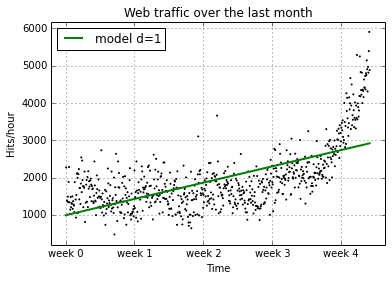

In [8]:
plot_model(f1, '-', 2, 'g')
plot_data(x, y, s=1)

Model parameters of fp1: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
('Error of the model of fp1:', array([  1.79983508e+08]))
f(x):          2
0.01053 x - 5.265 x + 1975
('Error: ', 179983507.87817919)


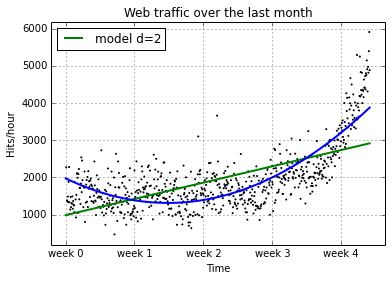

In [9]:
# create and plot models: Polynomial of degree = 2
fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)
print("Model parameters of fp1: %s" % fp2)
print("Error of the model of fp1:", res2)

f2 = sp.poly1d(fp2)
print ("f(x): %s" % f2)
print ("Error: ", error(f2, x, y))

plot_model(f1, '-', 2, 'g') # Model 1
plot_model(f2, '-', 2, 'b') # Model 2
plot_data(x, y, s=1)

In [10]:
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f100 = sp.poly1d(sp.polyfit(x, y, 100))

/Library/Python/2.7/site-packages/numpy-1.11.0-py2.7-macosx-10.10-intel.egg/numpy/lib/polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Library/Python/2.7/site-packages/numpy-1.11.0-py2.7-macosx-10.10-intel.egg/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [11]:
def plot_models(x, y, models, mx=None, ymax=None, xmin=None):
    
    colors = ['g', 'r', 'b', 'm', 'k']
    linestyles = ['-', '-', '--', '-', '-']

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=1)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["model d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')

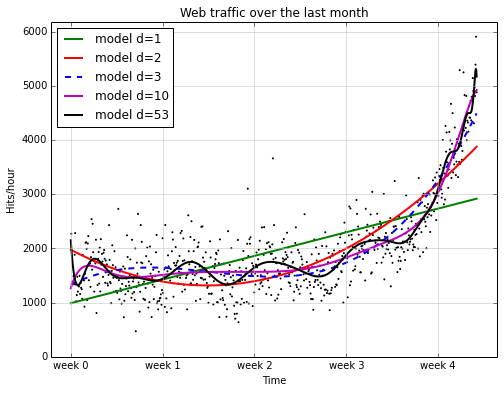

In [12]:
plot_models(x, y, [f1, f2, f3, f10, f100])

In [13]:
print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363641
Error d=53: 109452412.901221


Degre 3, 10, 100...

### Another look at our data

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


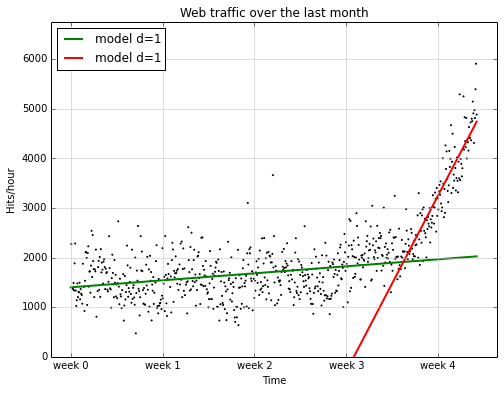

In [14]:
inflection = 3.5 * 7 * 24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

plot_models(x, y, [fa, fb])

In [15]:
len(xb)

147

In [16]:
print("Errors for only the time after inflection point")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905598
Error d=10: 21611594.263992
Error d=53: 18656108.805344
Error inflection=132950348.197616


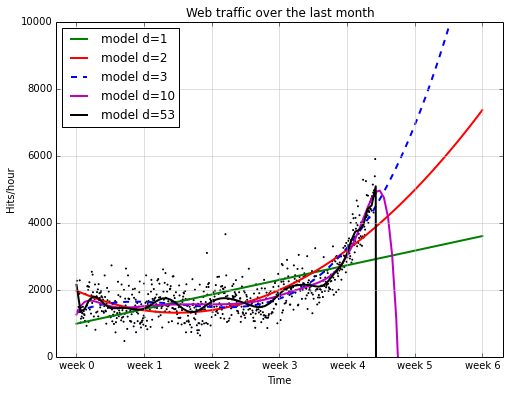

In [17]:
# extrapolating into the future
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    mx=sp.linspace(0, 6 * 7 * 24, 100),
    ymax=10000, xmin=0)

Trained only on data after inflection point


/Library/Python/2.7/site-packages/numpy-1.11.0-py2.7-macosx-10.10-intel.egg/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Library/Python/2.7/site-packages/numpy-1.11.0-py2.7-macosx-10.10-intel.egg/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


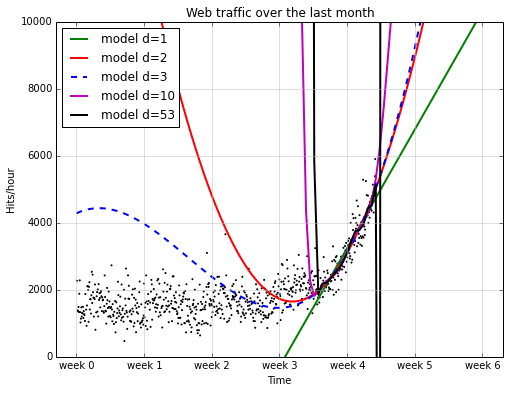

In [18]:
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))

plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [19]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.814905
Error d=53: 18300694.153998


In [20]:
# separating training from testing data
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))

test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))

print("fbt2(x)= \n%s"%fbt2)
print("fbt2(x)-100,000= \n%s"%(fbt2-100000))

fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

fbt2(x)= 
         2
0.07031 x - 72.9 x + 2.038e+04
fbt2(x)-100,000= 
         2
0.07031 x - 72.9 x - 7.962e+04


/Library/Python/2.7/site-packages/numpy-1.11.0-py2.7-macosx-10.10-intel.egg/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Library/Python/2.7/site-packages/numpy-1.11.0-py2.7-macosx-10.10-intel.egg/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


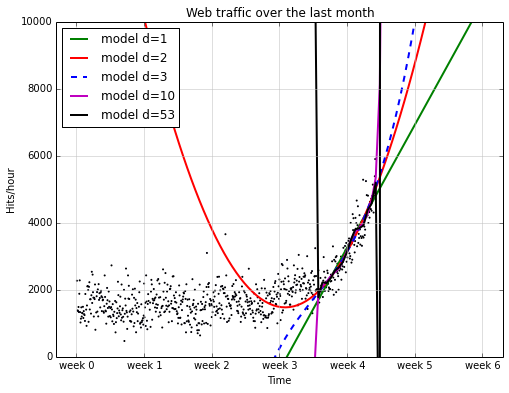

In [21]:
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [22]:
print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 7362614.700739
Error d=2: 6199586.173342
Error d=3: 6259741.607661
Error d=10: 6545478.813417
Error d=53: 7065561.134177


In [23]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

         2
0.07031 x - 72.9 x + 2.038e+04
         2
0.07031 x - 72.9 x - 7.962e+04
100,000 hits/hour expected at week 10.132535
